In [85]:
import numpy as np
import pandas as pd

%matplotlib widget
import matplotlib.

pd.options.display.max_columns = None

In [2]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

In [97]:
colsToRemove = ['pa_coating']

df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

Let's check whether the variables where succesfully removed:

In [26]:
df1.head()

ps                                                            \
             ps   ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff 2018-05-13                        4487.0             31.0   
1  cb031d4b18ff 2018-05-13                        4487.0             31.0   
2  cb031d4b18ff 2018-05-13                        4487.0             31.0   
3  cb031d4b18ff 2018-05-13                        4487.0             31.0   
4  cb031d4b18ff 2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                               

In [100]:
# help(df1.xs)

# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


Nice! Now we could keep removing unnecessary columns, but let's focus in the feature we want to keep/analyse.

My 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [205]:
df1.head()
df1.loc[:,(slice(None),['ps','nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss'])].head()

ps      qc                                            \
             ps      nr qc_salzrckhalt qc_durchfluss    p_product   
0  cb031d4b18ff  2891.0      99.455138     36.818009  B400 LE ASD   
1  cb031d4b18ff  2891.0      99.530406     36.787088  B400 LE ASD   
2  cb031d4b18ff  2891.0      99.523320     36.298863  B400 LE ASD   
3  cb031d4b18ff  2891.0      99.567549     36.045929  B400 LE ASD   
4  cb031d4b18ff  2891.0      99.577392     36.311320  B400 LE ASD   

                                       
       p_product_group p_product_type  
0  Brackwasserelemente   6989995295da  
1  Brackwasserelemente   6989995295da  
2  Brackwasserelemente   6989995295da  
3  Brackwasserelemente   6989995295da  
4  Brackwasserelemente   6989995295da

In [144]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns',)

XY  = df2[['nr','p_product_group','p_product_type','p_product','qc_salzrckhalt','qc_durchfluss']]
Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [ ]:
pd.option_context()

In [238]:
XY_mean=XY.groupby(['p_product_group','p_product_type','p_product','nr'])[['qc_salzrckhalt','qc_durchfluss']].mean()
XY_var =XY.groupby(['p_product_group','p_product_type','p_product','nr'])[['qc_salzrckhalt','qc_durchfluss']].var()

# pd.concat({'mean':XY_mean,'var':XY_var},axis=1)

pd.merge(XY_mean,XY_var,
         sort=True,
         suffixes=('_mean','_var'),
         left_index=True,
         right_index=True)

# pd.options.display.max_rows = 10000
pd.reset_option("display.max_rows")
XY_mean.join(XY_var,
      lsuffix='_mean',
      rsuffix='_var')

qc_salzrckhalt_mean  \
p_product_group     p_product_type p_product    nr                            
Brackwasserelemente 5200bdfc01a1   B400 HP      3388.0            98.690054   
                                                3389.0            98.672070   
                                                3426.0            99.680540   
                                                3427.0            99.583036   
                                                3428.0            99.564544   
                                                3431.1            99.692705   
                                                3431.2            99.727448   
                                                3432.0            99.685664   
                                                3433.0            99.694692   
                                                3434.0            99.668549   
                                                3437.0            99.716486   
                                                3462.0            99.553046   
                                                3463.0            99.722347   
                                                3464.0            99.631970   
                                                3465.0            99.727120   
                                                3466.0            99.639868   
                                                3467.0            98.568810   
                                                3468.0            99.682708   
                                                3469.0            99.542849   
                                                3470.0            99.405116   
                                                3471.0            99.364150   
                                                3472.0            99.613789   
                                                3473.0            99.658855   
                                                3474.0            99.688756   
                                                3475.0            99.623014   
                                                3476.0            98.648283   
                                                3523.0            99.723770   
                                                3524.0            98.743377   
                                                3525.1            99.692921   
                                                3525.2            99.697131   
...                                                                     ...   
Seewasserelemente   320144db7b4b   S440 HF      2942.0            99.653000   
                                                3791.1            99.616608   
                                                3791.4            99.411326   
                                                3791.5            98.157172   
                                                3792.0            99.553872   
                    cd7216b44ce3   S085 HR 4040 2896.4            96.925934   
                                                3032.1            98.676584   
                                   S400 HR      2678.0            99.713826   
                                                2680.0            99.598627   
                                                2719.0            98.541719   
                                                2824.0            99.770761   
                                                2825.0            99.753025   
                                                2847.0            99.811077   
                                                3032.2            89.597824   
                                                3033.0            99.675966   
                                                3090.0            99.600057   
                                                3663.0            99.588456   
                                                3664.0            99.684035   
                           

In [245]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

smry.

qc_salzrckhalt_mean  \
p_product_group     p_product_type p_product                            
Brackwasserelemente 5200bdfc01a1   B400 HP                  98.989131   
                                   B440 HP                  99.163510   
                    6989995295da   B085 LE 4040             99.144588   
                                   B400 LE                  98.935167   
                                   B400 LE ASD              99.055540   
                                   B440 LE                  98.782107   
                    6d2830b1e76d   B085 HF 4040             99.113559   
                                   B400 HF                  99.012014   
                                   B440 HF                  98.694982   
                    c77cb1692e0e   B085 ULP 4040            99.271320   
                                   B400 ULP ASD             98.050863   
                                   B440 ULP                 98.218921   
                    f187928fdb22   B370 FR                  98.812073   
                                   B400 FR ASD              99.013156   
                    f8ba29e9058b   B085 FR 4040             98.701824   
                                   B400 FR                  98.924073   
Seewasserelemente   320144db7b4b   S085 HF 4040             98.616838   
                                   S400 HF                  96.226096   
                                   S440 HF                  99.343883   
                    cd7216b44ce3   S085 HR 4040             98.377514   
                                   S400 HR                  96.653459   
                                   S440 HR                  98.344120   

                                                  qc_durchfluss_mean  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 47.087445   
                                   B440 HP                 54.066717   
                    6989995295da   B085 LE 4040             7.833652   
                                   B400 LE                 35.869479   
                                   B400 LE ASD             38.267354   
                                   B440 LE                 40.682883   
                    6d2830b1e76d   B085 HF 4040            10.152490   
                                   B400 HF                 45.510025   
                                   B440 HF                 47.145020   
                    c77cb1692e0e   B085 ULP 4040            8.298521   
                                   B400 ULP ASD            41.327267   
                                   B440 ULP                45.644223   
                    f187928fdb22   B370 FR                 40.580885   
                                   B400 FR ASD             46.633970   
                    f8ba29e9058b   B085 FR 4040            10.073621   
                                   B400 FR                 44.725683   
Seewasserelemente   320144db7b4b   S085 HF 4040             7.088446   
                                   S400 HF                 33.766855   
                                   S440 HF                 39.621275   
                    cd7216b44ce3   S085 HR 4040             6.265555   
                                   S400 HR                 27.447772   
                                   S440 HR                 25.526313   

                                                  qc_salzrckhalt_std  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                  8.454368   
                                   B440 HP                  7.167312   
                    6989995295da   B085 LE 4040             6.652158   
                                   B400 LE                  8.138183   
                                   B400 LE ASD              7.318613   
                                   B440 LE                  9.31

In [165]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


## Categorical variables:
**Is there a difference in the distribution of `qc_salzrckhalt` or `qc_durchfluss`**
 
 product type, group,etc 

In [14]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns')

In [15]:
XY = df2[['nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss']]
Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [16]:
X.nr.unique()
{col:X[col].nunique() for col in X}

{'nr': 1255, 'p_product': 22, 'p_product_group': 2, 'p_product_type': 8}

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

In [24]:
u_ptypes = XY['p_product_type'].unique()
u_pgroup = XY['p_product_group'].unique()

ValueError: not enough values to unpack (expected 2, got 0)

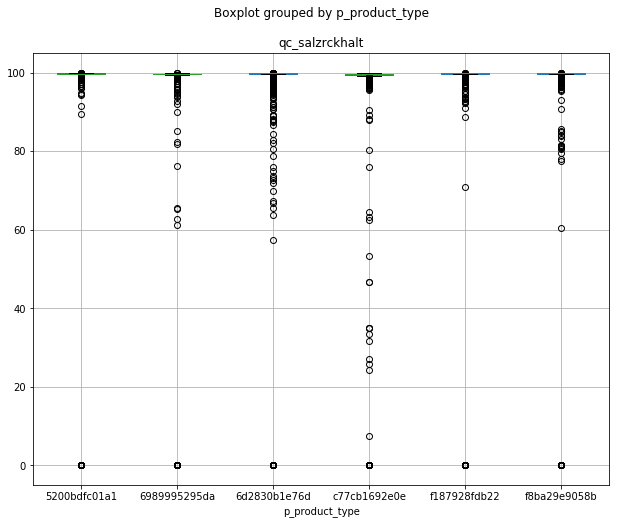

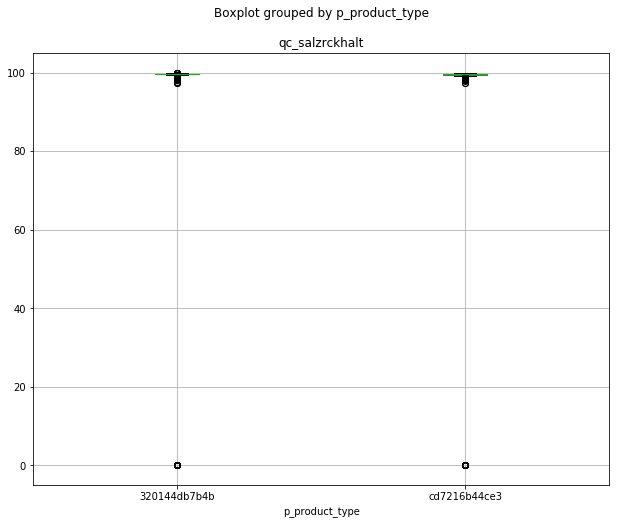

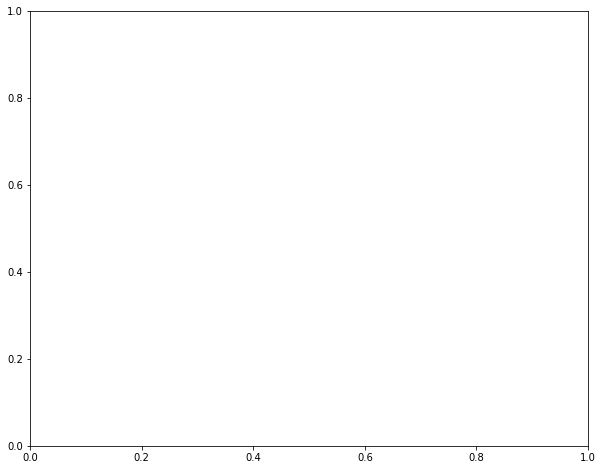

In [26]:
for gr in u_pgroup:
    XY[XY['p_product_group']==gr].boxplot(column='qc_salzrckhalt',by='p_product_type')